In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('data/train.csv', sep=';', header=0)

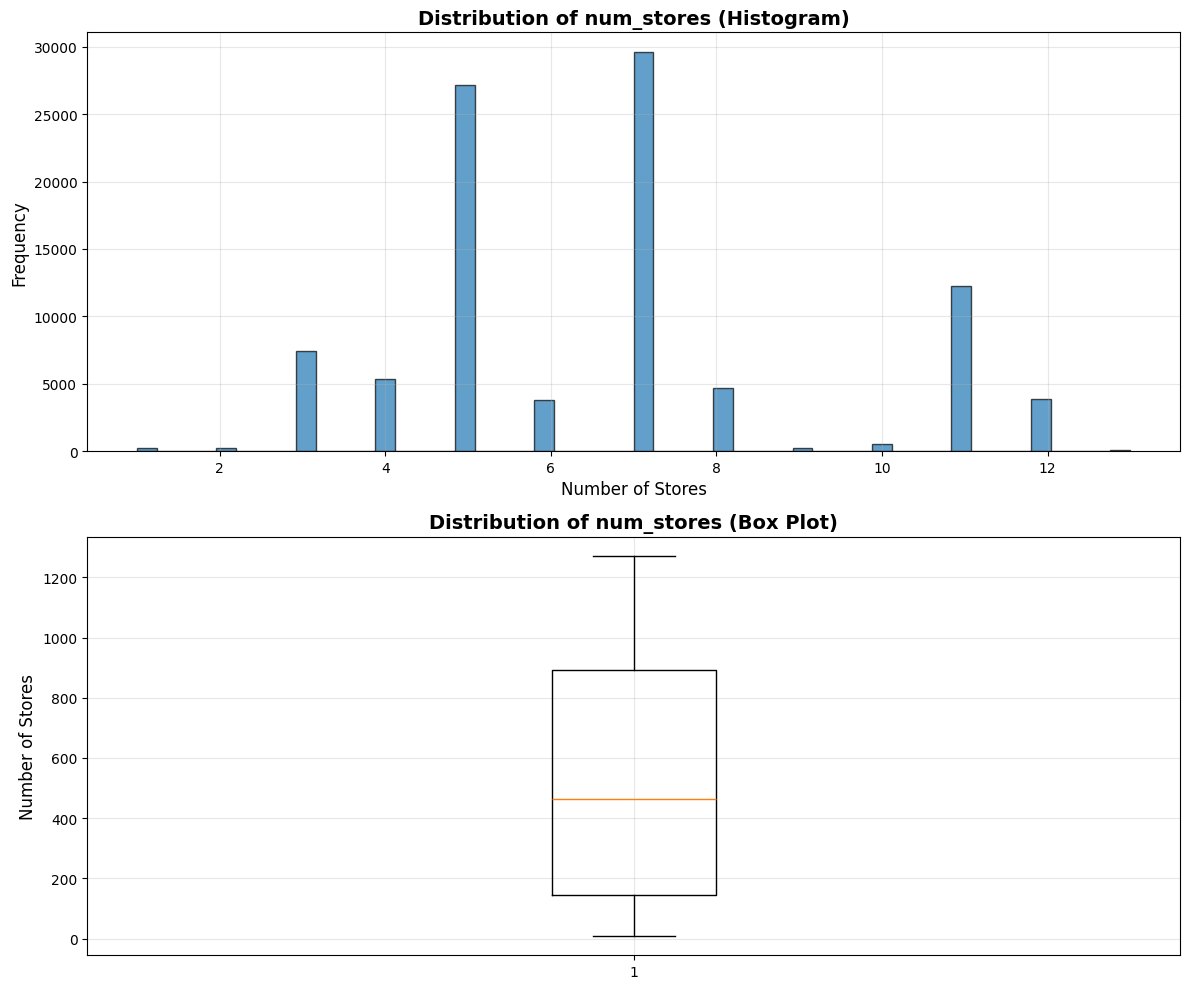

NUM_STORES STATISTICS
Total records: 95339
Non-null values: 95339
Null values: 0

Descriptive Statistics:
count    95339.000000
mean       531.356769
std        393.192002
min          8.000000
25%        146.000000
50%        464.000000
75%        893.000000
max       1272.000000
Name: num_stores, dtype: float64

Unique values: 1242
Min: 8
Max: 1272

Products with num_stores = 73: 82
Percentage: 0.09%
Average weekly_sales for num_stores=73: 92.87
Median weekly_sales for num_stores=73: 70.50


In [ ]:
# Plot distribution of num_stores
import matplotlib.pyplot as plt
import numpy as np

# Check if num_stores column exists
if 'num_stores' in df.columns:
    # Create figure with subplots
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))
    
    # Histogram
    axes[0].hist(df['num_stores'].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[0].set_xlabel('Number of Stores', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title('Distribution of num_stores (Histogram)', fontsize=14, fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    
    # Box plot
    axes[1].boxplot(df['num_stores'].dropna(), vert=True)
    axes[1].set_ylabel('Number of Stores', fontsize=12)
    axes[1].set_title('Distribution of num_stores (Box Plot)', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print("="*60)
    print("NUM_STORES STATISTICS")
    print("="*60)
    print(f"Total records: {len(df)}")
    print(f"Non-null values: {df['num_stores'].notna().sum()}")
    print(f"Null values: {df['num_stores'].isna().sum()}")
    print(f"\nDescriptive Statistics:")
    print(df['num_stores'].describe())
    print(f"\nUnique values: {df['num_stores'].nunique()}")
    print(f"Min: {df['num_stores'].min()}")
    print(f"Max: {df['num_stores'].max()}")
    
    # Check for value 73 specifically (the problematic one from product 3809)
    count_73 = (df['num_stores'] == 73).sum()
    print(f"\nProducts with num_stores = 73: {count_73}")
    if count_73 > 0:
        print(f"Percentage: {count_73 / len(df) * 100:.2f}%")
        # Show average sales for products with num_stores = 73
        if 'weekly_sales' in df.columns:
            sales_73 = df[df['num_stores'] == 73]['weekly_sales']
            print(f"Average weekly_sales for num_stores=73: {sales_73.mean():.2f}")
            print(f"Median weekly_sales for num_stores=73: {sales_73.median():.2f}")
else:
    print("Column 'num_stores' not found in dataframe")

In [ ]:
# Create and visualize binned num_stores (matching train_model.py binning)
# Bins: 0-100, 100-200, 200-300, ..., 1100-inf (12 bins total)

if 'num_stores' in df.columns:
    # Define bins matching train_model.py
    bins_stores = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, float('inf')]
    labels_stores = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600',
                    '600-700', '700-800', '800-900', '900-1000', '1000-1100', '1100+']
    
    # Create binned feature
    df['num_stores_bin'] = pd.cut(df['num_stores'].fillna(0), bins=bins_stores, labels=labels_stores, 
                                  right=False, include_lowest=True)
    
    # Plot binned distribution
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Bar chart of binned distribution
    bin_counts = df['num_stores_bin'].value_counts().sort_index()
    axes[0].bar(range(len(bin_counts)), bin_counts.values, edgecolor='black', alpha=0.7)
    axes[0].set_xticks(range(len(bin_counts)))
    axes[0].set_xticklabels(bin_counts.index, rotation=45, ha='right')
    axes[0].set_xlabel('Number of Stores (Binned)', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title('Distribution of num_stores (Binned into 12 Categories)', fontsize=14, fontweight='bold')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Show average sales per bin
    if 'weekly_sales' in df.columns:
        bin_sales = df.groupby('num_stores_bin')['weekly_sales'].mean().sort_index()
        axes[1].bar(range(len(bin_sales)), bin_sales.values, edgecolor='black', alpha=0.7, color='orange')
        axes[1].set_xticks(range(len(bin_sales)))
        axes[1].set_xticklabels(bin_sales.index, rotation=45, ha='right')
        axes[1].set_xlabel('Number of Stores (Binned)', fontsize=12)
        axes[1].set_ylabel('Average Weekly Sales', fontsize=12)
        axes[1].set_title('Average Weekly Sales by num_stores Bin', fontsize=14, fontweight='bold')
        axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Print bin statistics
    print("="*60)
    print("NUM_STORES BINNED STATISTICS")
    print("="*60)
    print(f"\nBin Distribution:")
    print(df['num_stores_bin'].value_counts().sort_index())
    print(f"\nBin Percentages:")
    print((df['num_stores_bin'].value_counts(normalize=True).sort_index() * 100).round(2))
    
    if 'weekly_sales' in df.columns:
        print(f"\nAverage Weekly Sales by Bin:")
        print(df.groupby('num_stores_bin')['weekly_sales'].agg(['mean', 'median', 'count']).sort_index())
        
        # Check which bin contains num_stores = 73
        products_73 = df[df['num_stores'] == 73]
        if len(products_73) > 0:
            bin_73 = products_73['num_stores_bin'].iloc[0]
            print(f"\nProducts with num_stores = 73 fall into bin: {bin_73}")
            print(f"Average sales for this bin: {df[df['num_stores_bin'] == bin_73]['weekly_sales'].mean():.2f}")
            print(f"Number of products in this bin: {len(df[df['num_stores_bin'] == bin_73])}")


In [ ]:
# Create and visualize binned num_sizes (matching train_model.py binning)
# Bins: 1-2, 2-3, 3-4, ..., 9-10, 10+ (10 bins total)

if 'num_sizes' in df.columns:
    # Define bins matching train_model.py
    bins_sizes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, float('inf')]
    labels_sizes = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']
    
    # Create binned feature
    df['num_sizes_bin'] = pd.cut(df['num_sizes'].fillna(1).clip(lower=1), bins=bins_sizes, 
                                 labels=labels_sizes, right=False, include_lowest=True)
    
    # Plot binned distribution
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))
    
    # Bar chart of binned distribution
    bin_counts = df['num_sizes_bin'].value_counts().sort_index()
    axes[0].bar(range(len(bin_counts)), bin_counts.values, edgecolor='black', alpha=0.7)
    axes[0].set_xticks(range(len(bin_counts)))
    axes[0].set_xticklabels(bin_counts.index, rotation=0)
    axes[0].set_xlabel('Number of Sizes (Binned)', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title('Distribution of num_sizes (Binned into 10 Categories)', fontsize=14, fontweight='bold')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Show average sales per bin
    if 'weekly_sales' in df.columns:
        bin_sales = df.groupby('num_sizes_bin')['weekly_sales'].mean().sort_index()
        axes[1].bar(range(len(bin_sales)), bin_sales.values, edgecolor='black', alpha=0.7, color='green')
        axes[1].set_xticks(range(len(bin_sales)))
        axes[1].set_xticklabels(bin_sales.index, rotation=0)
        axes[1].set_xlabel('Number of Sizes (Binned)', fontsize=12)
        axes[1].set_ylabel('Average Weekly Sales', fontsize=12)
        axes[1].set_title('Average Weekly Sales by num_sizes Bin', fontsize=14, fontweight='bold')
        axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Print bin statistics
    print("="*60)
    print("NUM_SIZES BINNED STATISTICS")
    print("="*60)
    print(f"\nBin Distribution:")
    print(df['num_sizes_bin'].value_counts().sort_index())
    print(f"\nBin Percentages:")
    print((df['num_sizes_bin'].value_counts(normalize=True).sort_index() * 100).round(2))
    
    if 'weekly_sales' in df.columns:
        print(f"\nAverage Weekly Sales by Bin:")
        print(df.groupby('num_sizes_bin')['weekly_sales'].agg(['mean', 'median', 'count']).sort_index())


In [4]:
# Configure pandas to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


NameError: name 'pd' is not defined

In [2]:
df = pd.read_csv('data/train.csv', sep=';', header=0)

In [5]:
len(df)

95339

In [14]:
df["color_name"].unique()

array(['AMARILLO', 'VERDE PASTEL', 'ARENA', 'CELESTE', 'TERRACOTA',
       'NEGRO', 'GRIS', 'KHAKI', 'BEIGE', 'NAVY', 'AZUL', 'BLANCO',
       'MORADO', 'MOSTAZA', 'GRANATE', 'MARRON', 'TEJANO NEGRO', 'CEREZA',
       'CRUDO', 'ROSA', 'MISTERIO', 'GRIS MEDIO VIGORE',
       'GRIS CLARO VIGORE', 'TEJANO OSCURO', 'AMARILLO PASTEL',
       'OFFWHITE', 'ROJO', 'NARANJA', 'BURDEOS', 'ROSA PASTEL', 'PIEDRA',
       'VERDE', 'CHOCOLATE', 'MALVA', 'TURQUESA', 'CORAL', 'ROSA LIGHT',
       'VAINILLA', 'AZUL NOCHE', 'CAMEL', 'TOPO', 'LILA', 'TEJANO GRIS',
       'VIOLETA', 'ANTRACITA', 'FUCSIA', 'ORO', 'TEJANO MEDIO',
       'GRIS OSCURO VIGORE', 'AGUA', 'MARINO', 'LIMA', 'ROSA FLUOR',
       'ELECTRICO', 'TAUPE', 'TEJANO CLARO', 'CALDERO', 'BLOOD',
       'MANDARINA', 'CHICLE', 'BOTELLA', 'TEJANO SOFT', 'COGNAC',
       'PETROLEO', 'PLATA', 'DIRTY CLARO', 'TINTA', 'VINO',
       'TEJANO GRIS OSCURO', 'DIRTY', 'OLIVA', 'MANZANA', 'CARAMELO',
       'HIELO', 'ROSA PALO', 'PERLA', 'MUSGO', 'INDIGO

In [32]:
#
df["neck_lapel_type"].unique()


array(['V-Neck', 'Shirt-style collar', nan, 'Regular', 'Close-fitting',
       'Peak Lapel', 'Turtle neck', 'Flap', 'Asymmetric', 'Rounded Neck',
       'Boat', 'Halter', 'Low cut', 'Perkins', 'Word honor', 'Draped',
       'Swan', 'Wrap collar', 'Off Shoulder', 'Pole', 'Tuxedo',
       'Open back', 'Mao', 'Hood', 'Funnel neck', 'Babydoll/Peter Pan',
       'Kimono', 'Henley collar'], dtype=object)

In [35]:
df["sleeve_length_type"].unique()
len(df["sleeve_length_type"].isna())

df["sleeve_length_type"].isna().sum()





np.int64(38003)

In [3]:
df[df["ID"]==224]

NameError: name 'df' is not defined